In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [20]:
# Load CSV (tab-separated) without headers first to inspect
df = pd.read_csv("sample_patients.csv", sep="\t", header=None)

# Print first two rows to check
print(df.head(2))


                                                   0
0  PatientID,Age,Gender,Weight,Height,BloodType,T...
1  P001,12,M,35,140,A+,Beta,2025-08-15,7.8,8.0,21...


In [25]:
# Load CSV correctly
df = pd.read_csv("sample_patients.csv", sep=",", engine="python")

# Strip any extra spaces from headers
df.columns = df.columns.str.strip()

# Check columns
print("Number of columns:", len(df.columns))
print(df.columns)
df.head()


Number of columns: 34
Index(['PatientID', 'Age', 'Gender', 'Weight', 'Height', 'BloodType',
       'ThalassemiaType', 'LastTransfusionDate', 'HemoglobinLevel',
       'AvgHemoglobinLast3', 'TransfusionIntervalDays', 'TransfusionVolume',
       'IronLevel', 'FerritinLevel', 'FatigueLevel', 'WeaknessLevel',
       'HeadacheLevel', 'SymptomHistory30d', 'DailyActivityScore30d',
       'DietCompliance', 'StressLevel', 'ChelationTherapyType',
       'MedicationAdherence', 'MedicationSideEffects', 'SleepQuality',
       'HydrationLevel', 'PredictedHemoglobinNext',
       'NextTransfusionDatePredicted', 'AIConfidence (%)', 'RiskScore',
       'HealthTipsGenerated', 'ActivityLevel', 'DigitalTwinID', 'Notes'],
      dtype='object')


,PatientID,Age,Gender,Weight,Height,BloodType,ThalassemiaType,LastTransfusionDate,HemoglobinLevel,AvgHemoglobinLast3,...,SleepQuality,HydrationLevel,PredictedHemoglobinNext,NextTransfusionDatePredicted,AIConfidence (%),RiskScore,HealthTipsGenerated,ActivityLevel,DigitalTwinID,Notes
0,P001,12,M,35,140,A+,Beta,2025-08-15,7.8,8.0,...,8,Medium,8.5,2025-09-05,88,15,Increase hydration; Maintain diet,Medium,P001,Regular chelation therapy
1,P002,8,F,25,120,B-,Beta,2025-08-12,6.9,7.2,...,6,Low,7.5,2025-09-01,82,20,Focus on sleep; Monitor fatigue,Low,P002,Occasional missed doses
2,P003,15,M,45,150,O+,Beta,2025-08-18,8.2,8.0,...,9,High,8.8,2025-09-12,90,10,Maintain activity; Continue therapy,High,P003,"Good adherence, active lifestyle"
3,P004,10,F,30,130,AB-,Beta,2025-08-10,7.0,7.1,...,7,Medium,7.6,2025-09-02,85,18,Improve diet; Hydration tips,Medium,P004,Needs follow-up on diet
4,P005,13,M,40,145,A-,Beta,2025-08-17,7.5,7.8,...,8,Medium,8.2,2025-09-07,87,14,Monitor activity; Continue medication,Medium,P005,"Stable, regular check-ups"


In [26]:
patient_id = "P001"
patient_row = df[df["PatientID"] == patient_id].iloc[0]
print("Patient selected:", patient_row["PatientID"])


Patient selected: P001


In [27]:
# Map text labels to numeric values
severity_map = {"None":0, "Mild":3, "Moderate":5, "Severe":8, "High":90, "Medium":60, "Low":30}

baseline_metrics = {
    "Hemoglobin Stability": float(patient_row["HemoglobinLevel"]),
    "Iron Overload Risk": float(patient_row["IronLevel"]),
    "Cardiac Function": float(patient_row.get("AvgHemoglobinLast3", 95)),  # fallback 95
    "Symptom Severity": (
        severity_map.get(str(patient_row["FatigueLevel"]),5) + 
        severity_map.get(str(patient_row["WeaknessLevel"]),5) + 
        severity_map.get(str(patient_row["HeadacheLevel"]),5)
    ) / 3,  # average
    "Treatment Adherence": severity_map.get(str(patient_row["MedicationAdherence"]),90),
    "Quality of Life": severity_map.get(str(patient_row.get("ActivityLevel","Medium")), 60)
}

baseline_metrics


{'Hemoglobin Stability': 7.8,
 'Iron Overload Risk': 75.0,
 'Cardiac Function': 8.0,
 'Symptom Severity': 5.333333333333333,
 'Treatment Adherence': 90,
 'Quality of Life': 60}

In [28]:
np.random.seed(42)
days = pd.date_range(datetime.today() - timedelta(days=29), periods=30)

trend_data = pd.DataFrame({"Date": days})

# Generate trends with small random walk
for metric, value in baseline_metrics.items():
    trend_data[metric] = np.clip(value + np.random.normal(0,1,30).cumsum()/10, 0, 100)

trend_data.head()


,Date,Hemoglobin Stability,Iron Overload Risk,Cardiac Function,Symptom Severity,Treatment Adherence,Quality of Life
0,2025-07-25 12:20:50.712746,7.849671,74.939829,7.952083,5.343041,90.079103,60.025049
1,2025-07-26 12:20:50.712746,7.835845,75.125057,7.933517,5.439906,89.988164,60.059694
2,2025-07-27 12:20:50.712746,7.900614,75.123707,7.822883,5.369700,90.128444,59.991692
3,2025-07-28 12:20:50.712746,8.052917,75.017936,7.703263,5.336934,89.988259,60.014917
4,2025-07-29 12:20:50.712746,8.029501,75.100191,7.784515,5.297723,90.046944,60.044224


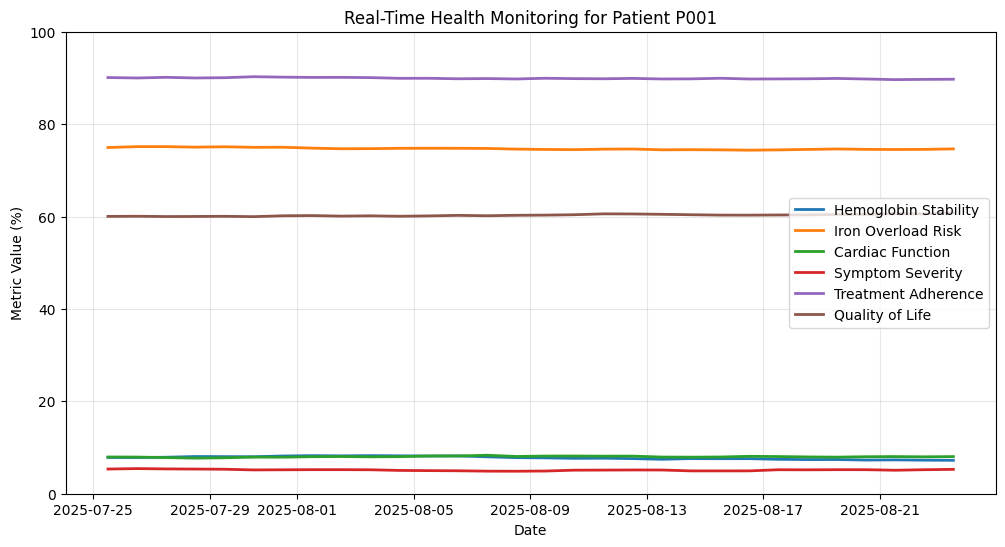

In [29]:
plt.figure(figsize=(12,6))

for metric in baseline_metrics.keys():
    plt.plot(trend_data["Date"], trend_data[metric], label=metric, linewidth=2)

plt.title(f"Real-Time Health Monitoring for Patient {patient_id}")
plt.xlabel("Date")
plt.ylabel("Metric Value (%)")
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
